# Logistic regression

This notebook shows the functionality of the LogisticRegression class in models/logistic_regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from models.logistic_regression import LogisticRegression
from utils.datasets import toy_classification_dataset
from utils.visualization import plot_decision_boundary

In [2]:
%matplotlib inline

# Turn interactive plotting off
plt.ioff()

Despite its name, the logistic regression is a classification algorithm. It owes the name to its similarity with linear regression. The model maps a linear combination of the input features to a probablity using the standard logistic function or the sigmoid function:

$$
\hat{y} = \frac{1}{1+e^{- XW}}
$$

It performs binary classfication, although it can be extended to multinomial classification using the one-vs-all approach for instance.

## Classification on a toy dataset

In [3]:
(x_train, y_train), (x_test, y_test) = toy_classification_dataset(features=2, classes=2)

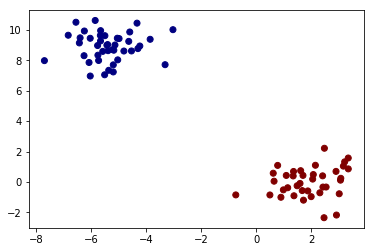

In [4]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet')
plt.show()

In [5]:
model = LogisticRegression(n_features=2)

In [6]:
loss, acc = model.fit(x_train, y_train)

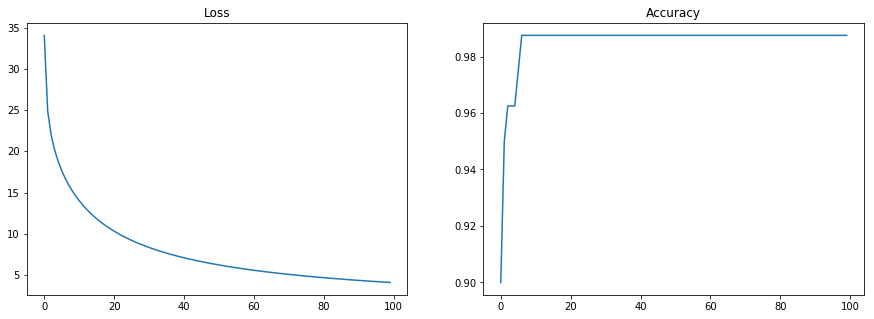

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])

ax1.plot(loss)
ax1.set_title('Loss')

ax2.plot(acc)
ax2.set_title('Accuracy')

plt.show()

## Assesing the model on the test set

In [8]:
y_hat = model.predict(x_test)

In [9]:
loss = model.loss(y_test, y_hat)
acc = np.mean(np.around(y_hat)==y_test)

print("Performance on the test set:\n\n\tLoss={}\n\tAccuracy={}".format(loss, acc))

Performance on the test set:

	Loss=1.453653081816926
	Accuracy=1.0


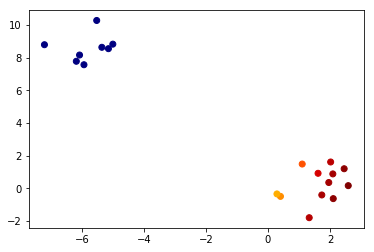

In [10]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_hat, cmap='jet')
plt.show()

### Visualize decision boundary

[[-8.20827412 -2.79930516]
 [-8.14898966 -2.79930516]
 [-8.0897052  -2.79930516]
 ...
 [ 3.47076428 11.28030137]
 [ 3.53004874 11.28030137]
 [ 3.5893332  11.28030137]]
[1.35433317e-04 1.45643597e-04 1.56623506e-04 ... 8.44356446e-01
 8.53672402e-01 8.62521546e-01]
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


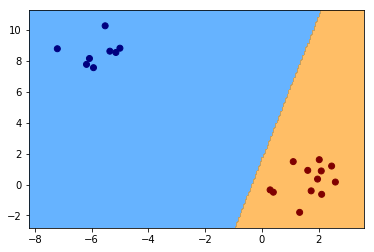

In [11]:
ax = plot_decision_boundary(model.predict,
                            x_range=[x_test[:, 0].min()-1, x_test[:, 0].max()+1],
                            y_range=[x_test[:, 1].min()-1, x_test[:, 1].max()+1])
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='jet', label='True classes')
plt.show()